# Section 1.3 — Descriptive statistics

This notebook contains all the code from [Section 1.3 Descriptive Statistics](https://minireference.com/static/excerpts/noBSstats/noBSstats_ch01_DATA.pdf#page=80) of the **No Bullshit Guide to Statistics**.

All the data manipulations are done using the `pandas` library,
and data visualizations are based on the `seaborn` library.

Code cells containing an `ALT` comment and commented out show alternative way for computing the same quantities or additional details that were not included in the book. It's up to you if you want to learn about these alternative options—just uncomment the code and execute.

#### Notebook setup

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Pandas setup
pd.set_option("display.precision", 2)

In [3]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)

%config InlineBackend.figure_format = 'retina'

## Numerical variables

### Definitions

### Descriptive statistics for the students dataset

#### Load the `students` dataset from CSV

In [4]:
import pandas as pd
students = pd.read_csv("../datasets/students.csv")
students

,student_ID,background,curriculum,effort,score
0,1,arts,debate,10.96,75.0
1,2,science,lecture,8.69,75.0
2,3,arts,debate,8.60,67.0
3,4,arts,lecture,7.92,70.3
4,5,science,debate,9.90,76.1
5,6,business,debate,10.80,79.8
6,7,science,lecture,7.81,72.7
7,8,business,lecture,9.13,75.4
8,9,business,lecture,5.21,57.0
9,10,science,lecture,7.71,69.0


In [5]:
# what type of object is `students`?
type(students)

pandas.core.frame.DataFrame

In [6]:
# rows
students.index

RangeIndex(start=0, stop=15, step=1)

In [7]:
# columns
students.columns

Index(['student_ID', 'background', 'curriculum', 'effort', 'score'], dtype='object')

In [8]:
# info about memory and data types of each column
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_ID  15 non-null     int64  
 1   background  15 non-null     object 
 2   curriculum  15 non-null     object 
 3   effort      15 non-null     float64
 4   score       15 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 728.0+ bytes


#### Focus on the `score` variable

Let's look at the `score` variable.

In [9]:
scores = students["score"]

In [10]:
scores.count()

15

In [11]:
scores.sort_values()

8     57.0
13    57.6
12    62.9
2     67.0
9     69.0
3     70.3
10    70.4
6     72.7
0     75.0
1     75.0
7     75.4
4     76.1
5     79.8
14    84.3
11    96.2
Name: score, dtype: float64

In [12]:
# # ALT
# sorted(scores)

### Min, max, and median

In [13]:
scores.min()

57.0

In [14]:
scores.max()

96.2

In [15]:
scores.max() - scores.min()  # Range

39.2

In [16]:
scores.median()

72.7

### Strip plot

<Axes: xlabel='score'>

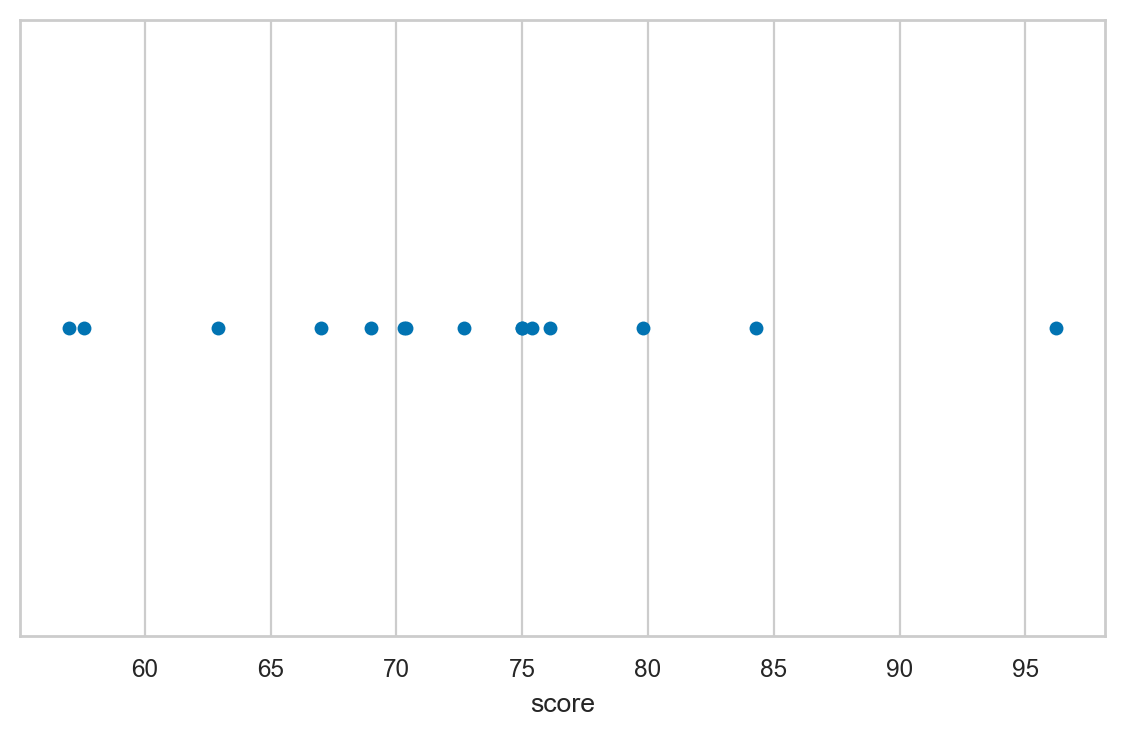

In [17]:
import seaborn as sns
sns.stripplot(data=students, x="score", jitter=0)

In [18]:
# # ALT  also show mean via https://stackoverflow.com/a/67579487/127114
# with plt.rc_context({"figure.figsize":(7,2)}):
#     sns.stripplot(x="score", data=students, jitter=0.03, alpha=0.6)
#     color0 = sns.color_palette()[0]
#     sns.boxplot(data=students,
#                 showmeans=True,
#                 meanline=True,
#                 meanprops={'color': color0, 'ls': '-', 'lw': 2},
#                 medianprops={'visible': False},
#                 whiskerprops={'visible': False},
#                 zorder=10,
#                 x="score",
#                 showfliers=False,
#                 showbox=False,
#                 showcaps=False)

### Mean, variance, and standard deviation

In [19]:
scores.mean()

72.58

In [20]:
scores.var()  # sample variance, 1/(n-1) EE(x-mean)^2

99.58600000000001

In [21]:
scores.std()

9.979278531036199

### Histograms

In [22]:
bins = [50, 60, 70, 80, 90, 100]
scores.value_counts(bins=bins, sort=False)

(49.999, 60.0]    2
(60.0, 70.0]      3
(70.0, 80.0]      8
(80.0, 90.0]      1
(90.0, 100.0]     1
Name: score, dtype: int64

In [23]:
# note mode is the bin 70--80, which contains 8 values

<Axes: xlabel='score', ylabel='Count'>

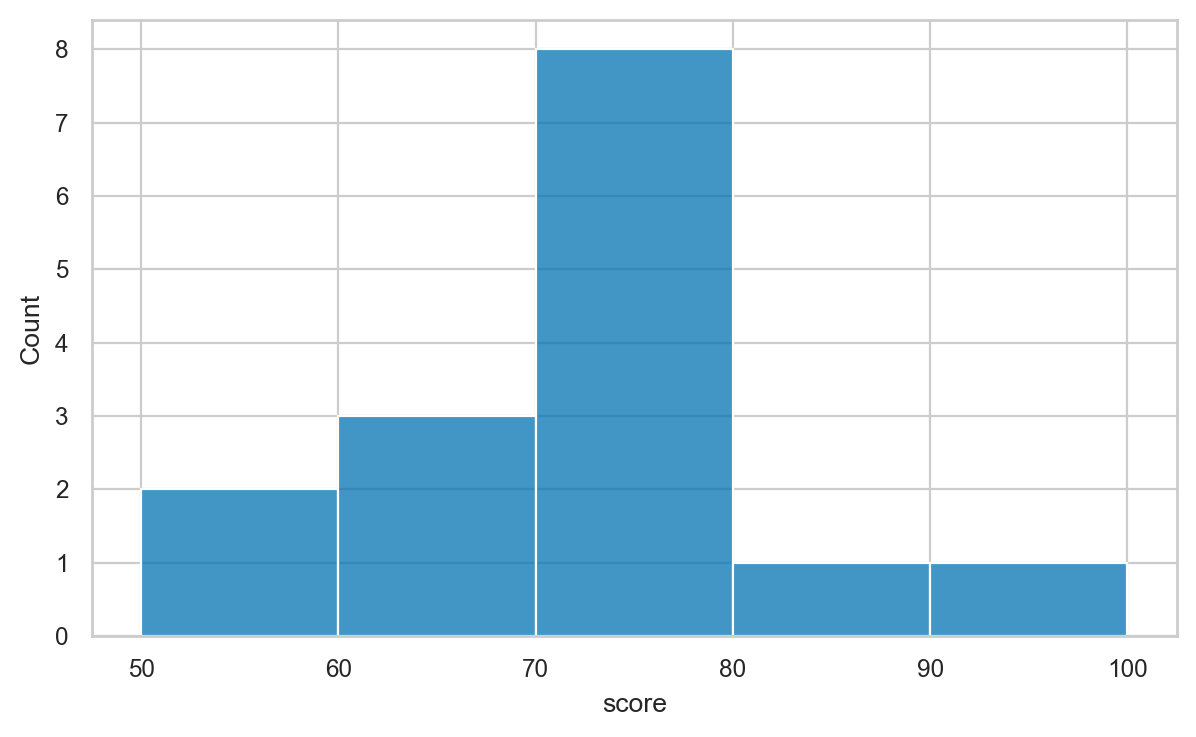

In [24]:
bins = [50, 60, 70, 80, 90, 100]
sns.histplot(data=students, x="score", bins=bins)

### Quartiles

In [25]:
Q1 = scores.quantile(q=0.25)
Q1

68.0

In [26]:
Q2 = scores.quantile(q=0.5)
Q2

72.7

In [27]:
Q3 = scores.quantile(q=0.75)
Q3

75.75

In [28]:
IQR = Q3 - Q1
IQR

7.75

### Box plots

<Axes: xlabel='score'>

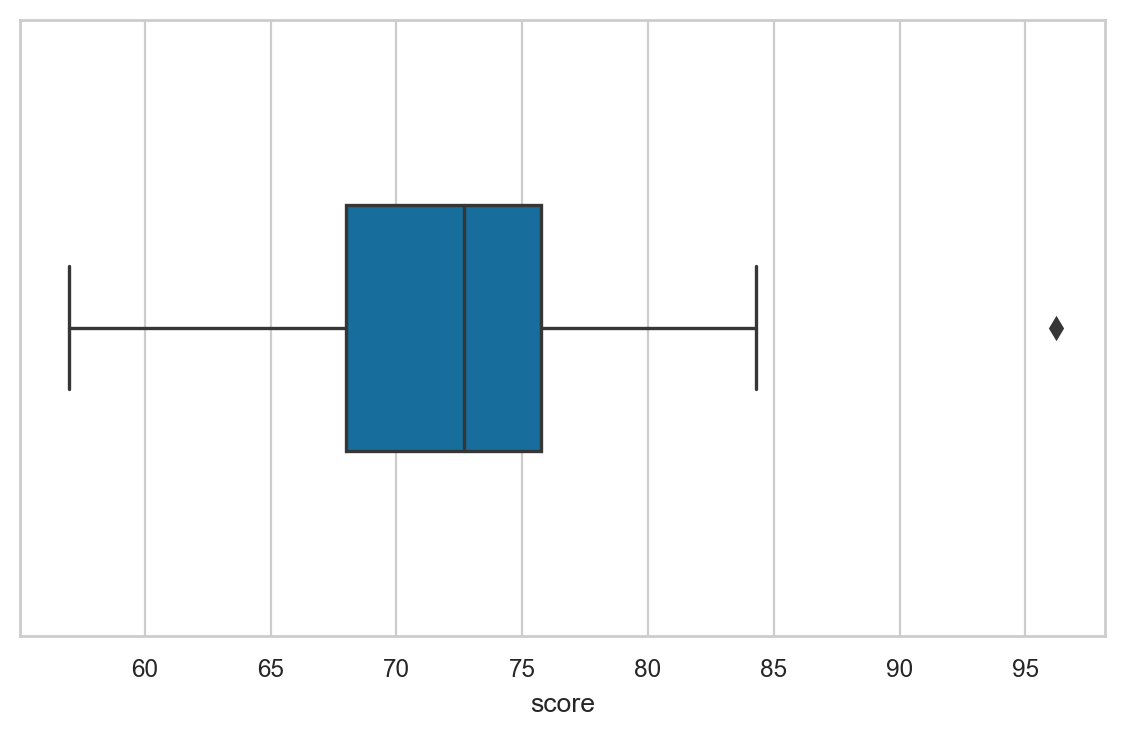

In [29]:
# box plot
sns.boxplot(data=students, x="score", width=0.4)

## All summary statistics

In [30]:
scores.describe()

count    15.00
mean     72.58
std       9.98
min      57.00
25%      68.00
50%      72.70
75%      75.75
max      96.20
Name: score, dtype: float64

In [31]:
students[["score"]].describe().T

,count,mean,std,min,25%,50%,75%,max
score,15.0,72.58,9.98,57.0,68.0,72.7,75.75,96.2


## Comparing two numeric variables


<Axes: xlabel='effort', ylabel='score'>

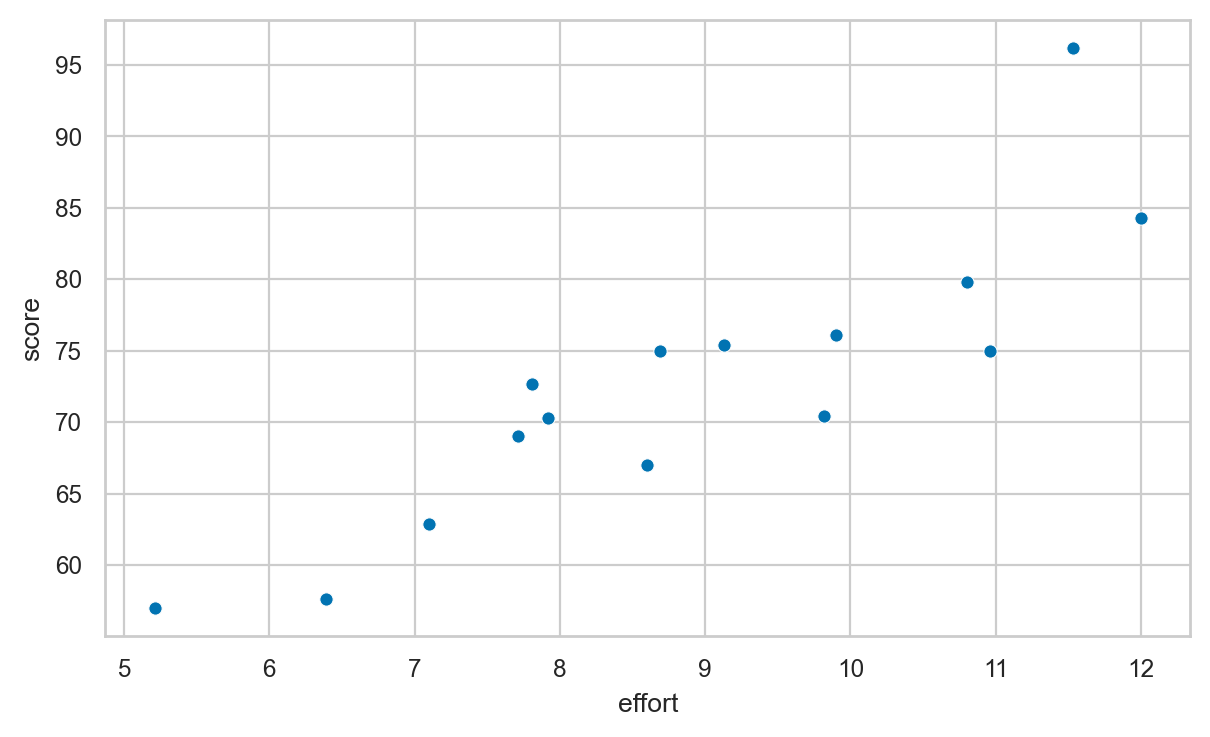

In [32]:
sns.scatterplot(data=students, x="effort", y="score")

### Covariance and correlation

In [33]:
print(students[["effort", "score"]].cov())

        effort  score
effort     3.8  17.10
score     17.1  99.59


In [34]:
students[["effort", "score"]].corr()

,effort,score
effort,1.00,0.88
score,0.88,1.00


In [35]:
students[["effort","score"]].corr().loc["score","effort"]

0.8794375135614694

## Multiple numerical variables

Extract data for the two groups:

In [36]:
dstudents = students[students["curriculum"]=="debate"]
lstudents = students[students["curriculum"]=="lecture"]

In [37]:
dstudents["score"].describe()

count     8.00
mean     76.46
std      10.52
min      62.90
25%      69.55
50%      75.55
75%      80.92
max      96.20
Name: score, dtype: float64

In [38]:
lstudents["score"].describe()

count     7.00
mean     68.14
std       7.76
min      57.00
25%      63.30
50%      70.30
75%      73.85
max      75.40
Name: score, dtype: float64

### Strip plots

<Axes: xlabel='score', ylabel='curriculum'>

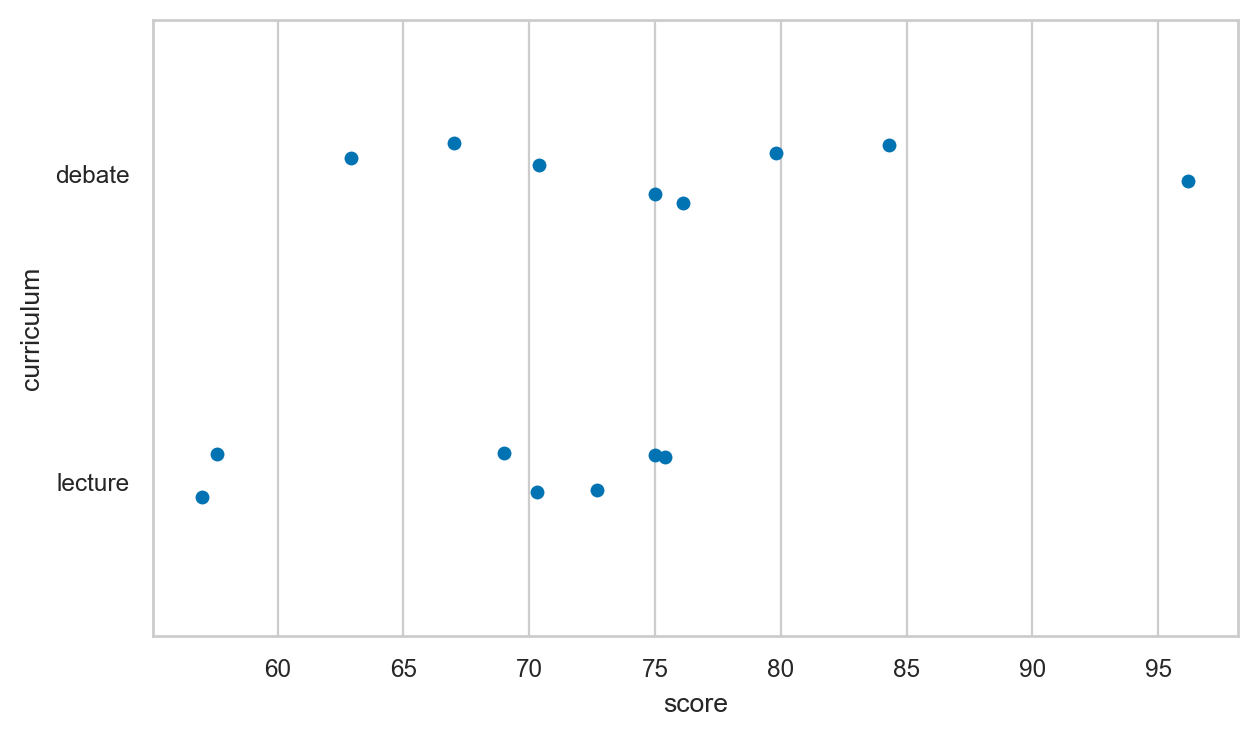

In [39]:
sns.stripplot(data=students, x="score", y="curriculum")

### Box plots

<Axes: xlabel='score', ylabel='curriculum'>

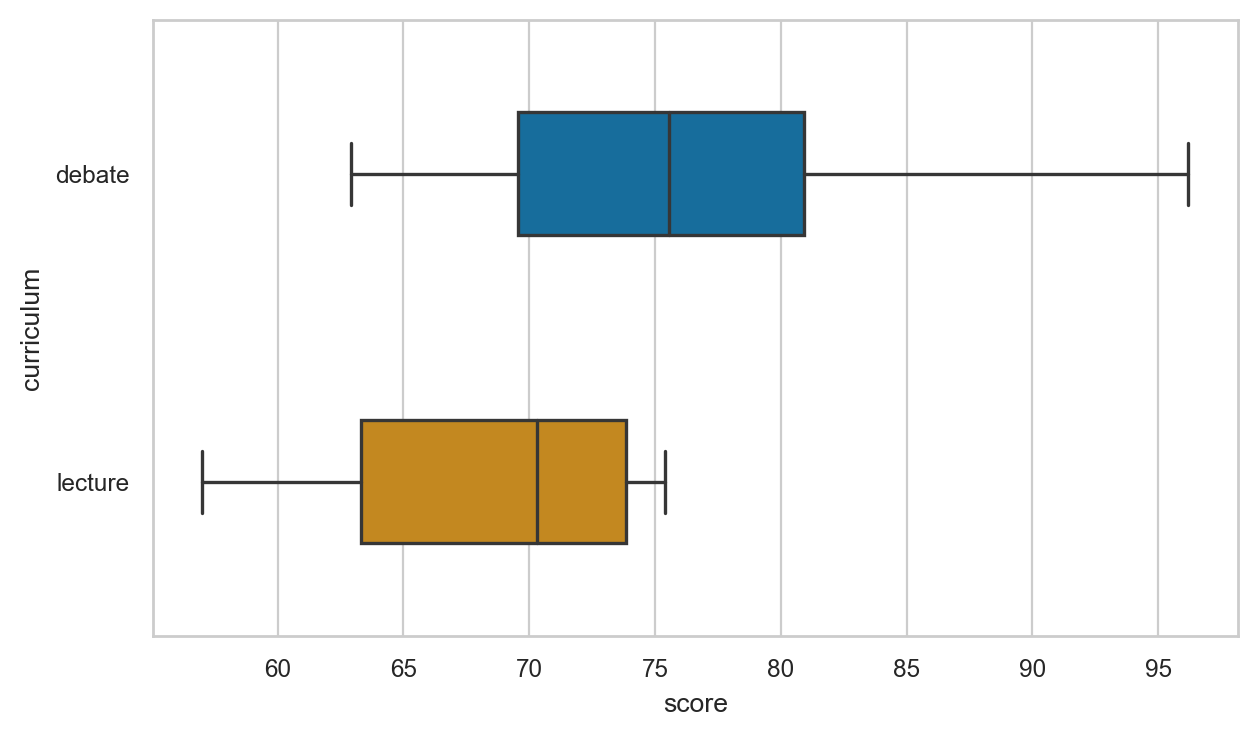

In [40]:
sns.boxplot(data=students, x="score", y="curriculum", width=0.4)

### Histograms

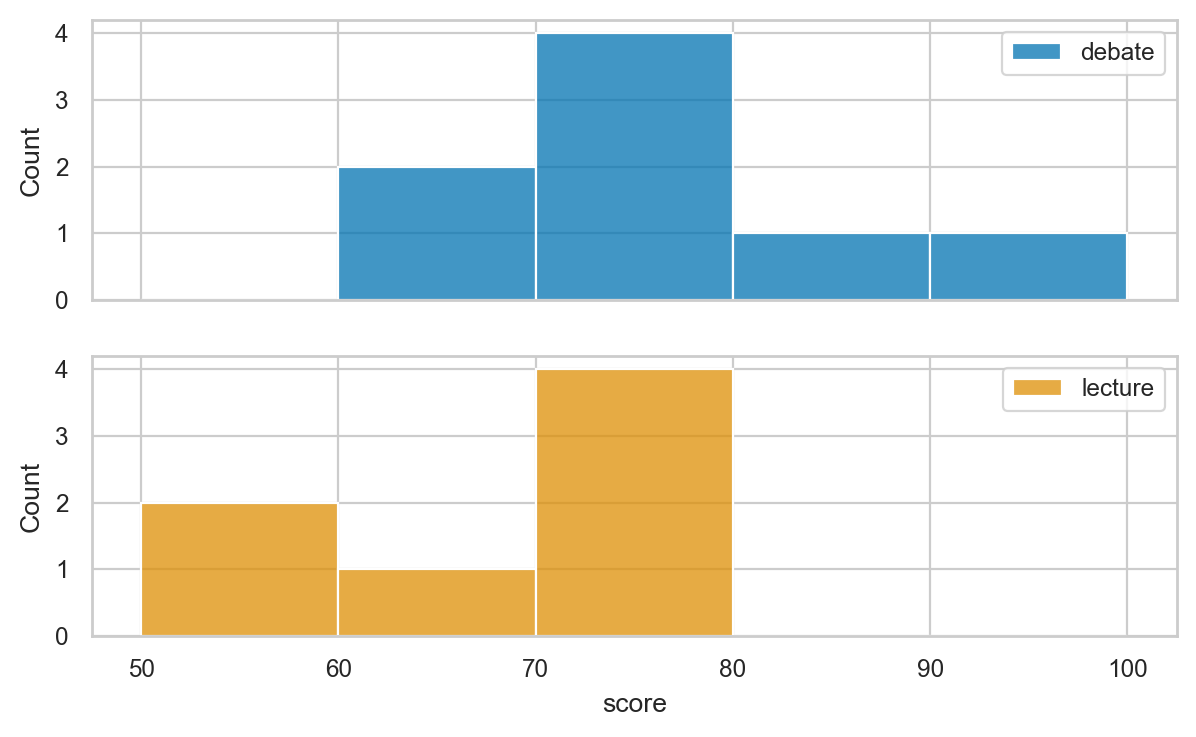

In [41]:
# histograms
fig, axs = plt.subplots(2, 1, sharex=True)

# prepare data
dstudents = students[students["curriculum"]=="debate"]
lstudents = students[students["curriculum"]=="lecture"]

# select colors to use for the two groups  
blue, yellow  = sns.color_palette()[0], sns.color_palette()[1]

# plot histograms
bins = [50, 60, 70, 80, 90, 100]
sns.histplot(data=dstudents, x="score", color=blue, ax=axs[0], bins=bins)
sns.histplot(data=lstudents, x="score", color=yellow, ax=axs[1], bins=bins)

# add labels
axs[0].legend(labels=["debate"])
axs[1].legend(labels=["lecture"])

In [42]:
# # ALT grouped bar charts
# sns.histplot(data=students, x="score", hue="curriculum",
#              bins=bins, multiple="dodge")

In [43]:
# # ALT use `displot` with curriculum as row-variable
# bins = [50, 60, 70, 80, 90, 100]
# sns.displot(data=students, x='score', row='curriculum',
#             hue='curriculum', alpha=0.8, bins=bins, aspect=3.3, height=2)

## Categorical data

### Analysis of the `background` variable

In [44]:
backgrounds = students["background"]

The Pandas methods `.value_counts()` can be used to compute the frequencies of any series or data frame.

In [45]:
backgrounds.value_counts()

science     6
arts        5
business    4
Name: background, dtype: int64

We often chain the `.sort_index()` after `.value_counts()` to sort the results in alphabetical order.

In [46]:
backgrounds.value_counts().sort_index()

arts        5
business    4
science     6
Name: background, dtype: int64

Use the option `normalize=True` for the methods `.value_counts()` to compute relative frequencies.

In [47]:
# relative frequencies
backgrounds.value_counts(normalize=True)

science     0.40
arts        0.33
business    0.27
Name: background, dtype: float64

The method `.describe()` shows some useful facts about the variable.

In [48]:
backgrounds.describe()

count          15
unique          3
top       science
freq            6
Name: background, dtype: object

In [49]:
# # ALT
# backgrounds.value_counts() / backgrounds.count()

In [50]:
# # ALT  combiend table with both frequency and relative frequency
# df2 = pd.DataFrame({
#     "frequency": backgrounds.value_counts(),
#     "relative frequency": backgrounds.value_counts(normalize=True)
# })
# df2

<Axes: xlabel='background', ylabel='count'>

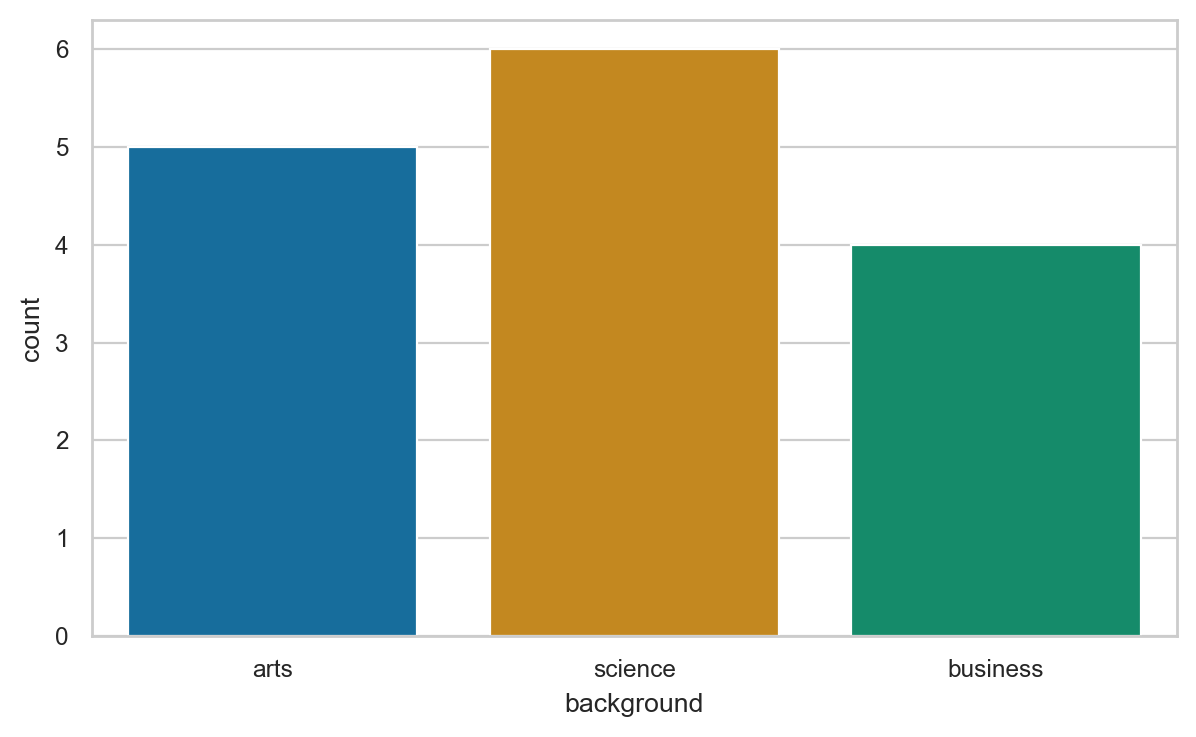

In [51]:
# bar chart of counts
sns.countplot(data=students, x="background")

In [52]:
# # ALT bar chart with relative frequencies
# df3 = (backgrounds
#  .value_counts(normalize=True)
#  .sort_index()
#  .rename("relative frequency")
#  .rename_axis("background")
#  .reset_index()
# )
# sns.barplot(data=df3, x="background", y="relative frequency")

## Comparing two categodescribeal variables

In [53]:
students[ ["background","curriculum"] ]

,background,curriculum
0,arts,debate
1,science,lecture
2,arts,debate
3,arts,lecture
4,science,debate
5,business,debate
6,science,lecture
7,business,lecture
8,business,lecture
9,science,lecture


In [54]:
# joint frequencies
pd.crosstab(index=students["curriculum"],
            columns=students["background"],
            margins=True, margins_name="TOTAL")

background,arts,business,science,TOTAL
curriculum,,,,
debate,4,2,2,8
lecture,1,2,4,7
TOTAL,5,4,6,15


In [55]:
# joint relative frequencies
pd.crosstab(index=students["curriculum"],
            columns=students["background"],
            margins=True, margins_name="TOTAL",
            normalize=True)

background,arts,business,science,TOTAL
curriculum,,,,
debate,0.27,0.13,0.13,0.53
lecture,0.07,0.13,0.27,0.47
TOTAL,0.33,0.27,0.40,1.00


<Axes: xlabel='background', ylabel='count'>

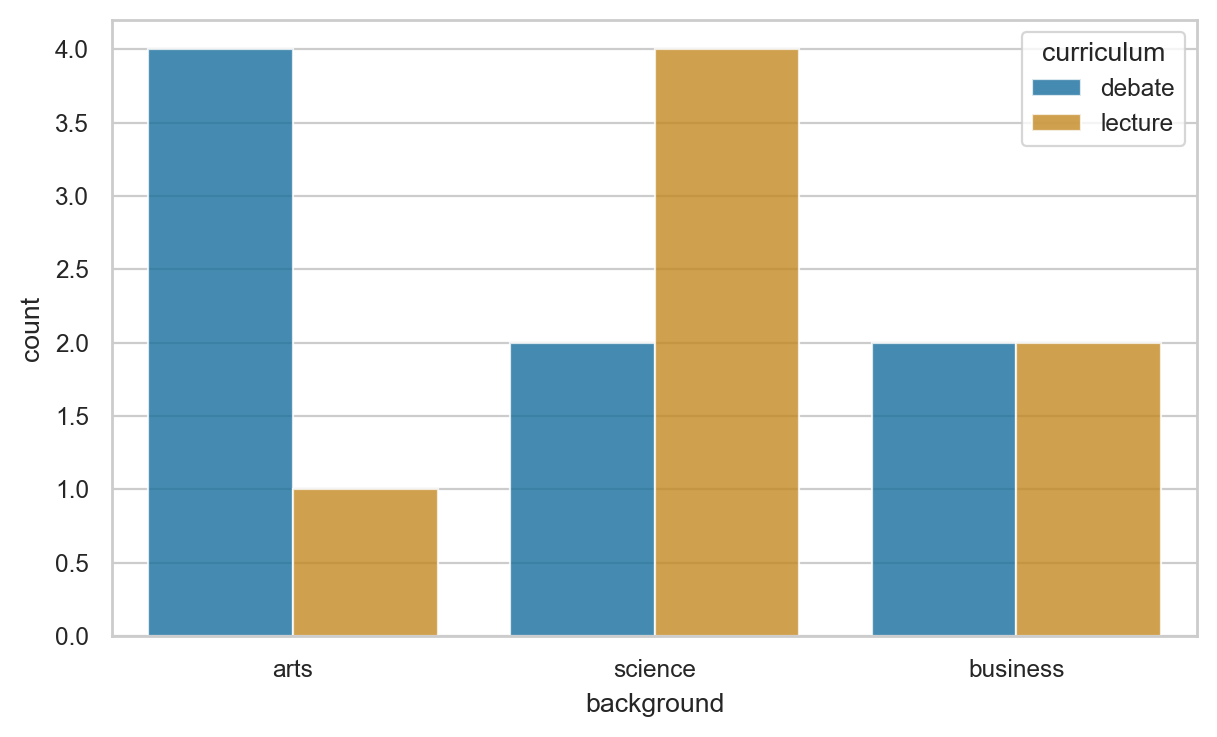

In [56]:
sns.countplot(data=students, x="background",
              hue="curriculum", alpha=0.8)

<Axes: xlabel='background', ylabel='Count'>

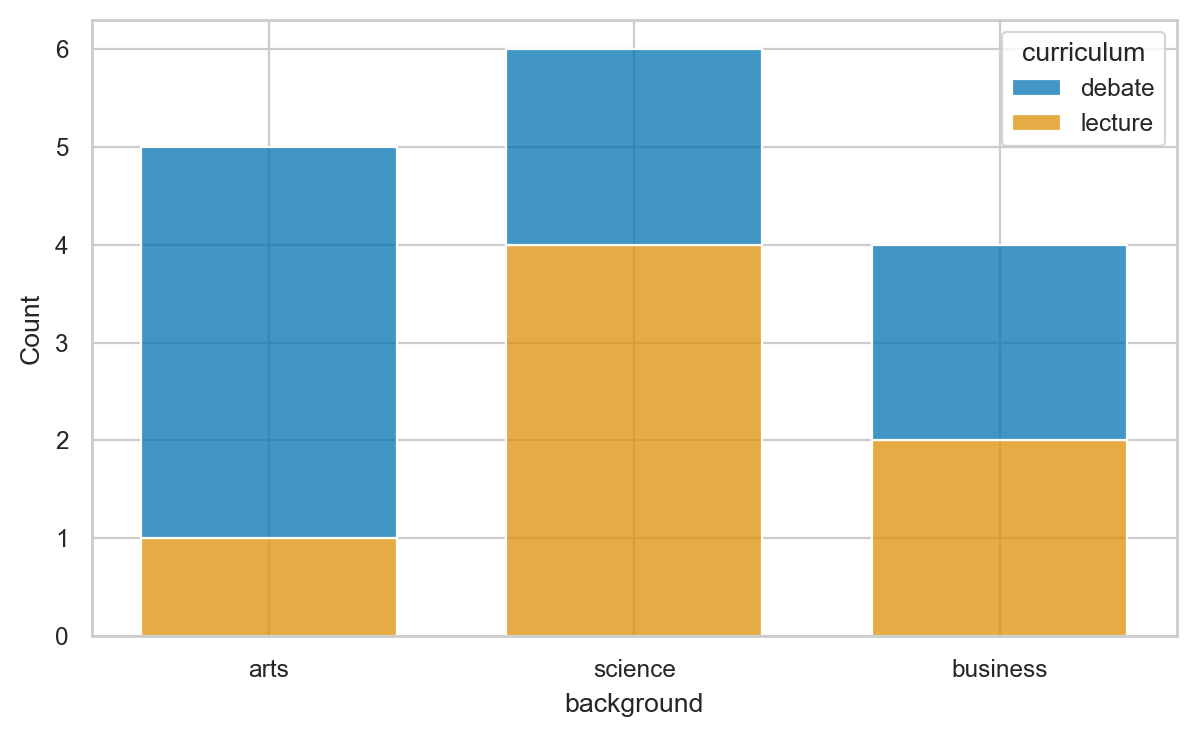

In [57]:
sns.histplot(data=students, x="background",
             hue="curriculum", multiple="stack", shrink=.7)

In [58]:
# # ALT  using displot
# sns.displot(data=students, x="background", hue="curriculum", multiple="stack", shrink=0.8)

In [59]:
# # ALT2  using Pandas plot function for crosstab
# pd.crosstab(
#     index=students["curriculum"],
#     columns=students["background"],
# ).T.plot(kind="bar", stacked=True, rot=0)

In [60]:
# # stacked joint relative frequencies
# sns.histplot(data=students, x="background",
#              hue="curriculum", shrink=.7,
#              multiple="stack", stat="proportion")

In [61]:
# curriculum relative frequencies conditional on background
pd.crosstab(index=students["curriculum"],
            columns=students["background"],
            margins=True, margins_name="TOTAL",
            normalize="columns")

background,arts,business,science,TOTAL
curriculum,,,,
debate,0.8,0.5,0.33,0.53
lecture,0.2,0.5,0.67,0.47


Text(0, 0.5, 'conditional relative frequency')

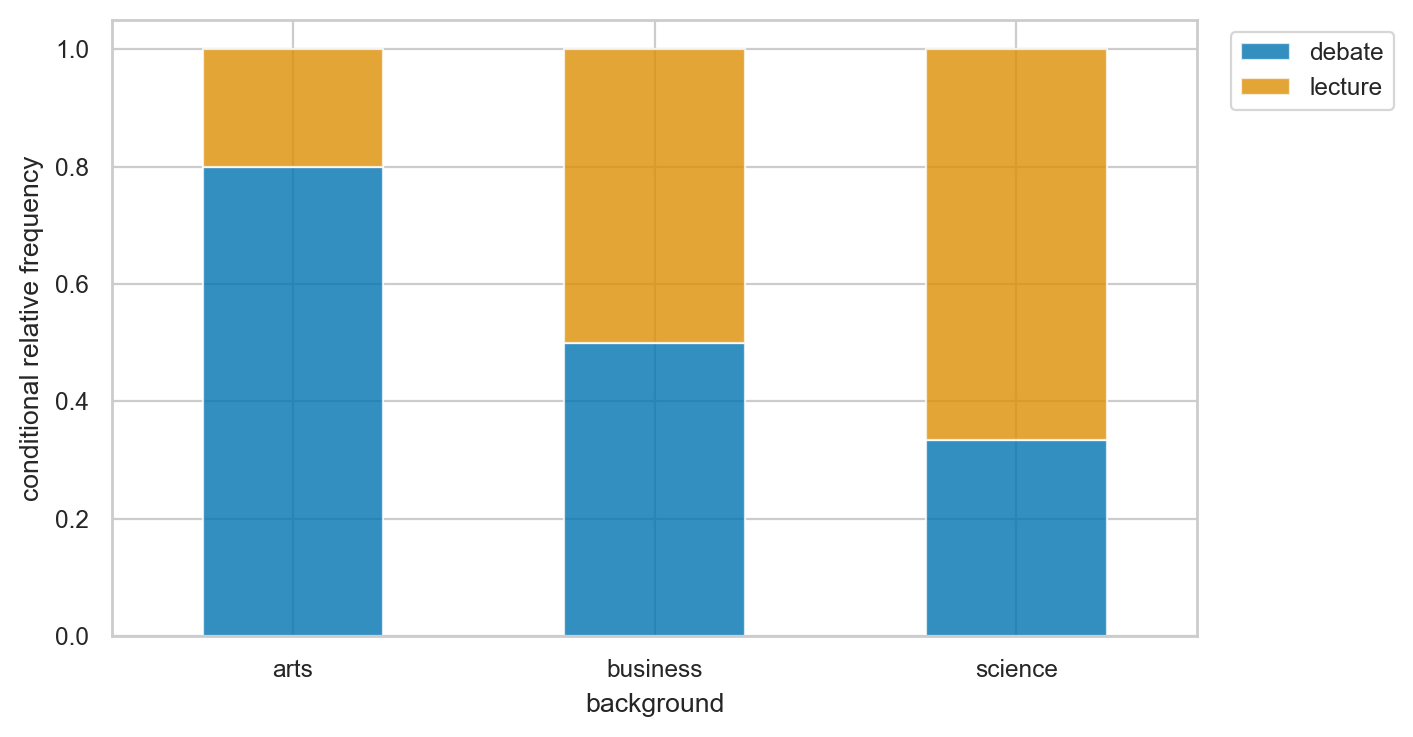

In [62]:
ct1 = pd.crosstab(
    index=students["curriculum"],
    columns=students["background"],
    normalize="columns",
)
axct1 = ct1.T.plot(kind="bar", stacked=True, rot=0, alpha=0.8)
plt.legend(loc = "upper left", bbox_to_anchor=(1.02,1))
plt.ylabel("conditional relative frequency")

In [63]:
# background relative frequencies conditional on curriculum
pd.crosstab(index=students["curriculum"],
            columns=students["background"],
            margins=True, margins_name="TOTAL",
            normalize="index")

background,arts,business,science
curriculum,,,
debate,0.50,0.25,0.25
lecture,0.14,0.29,0.57
TOTAL,0.33,0.27,0.40


Text(0.5, 0, 'conditional relative frequency')

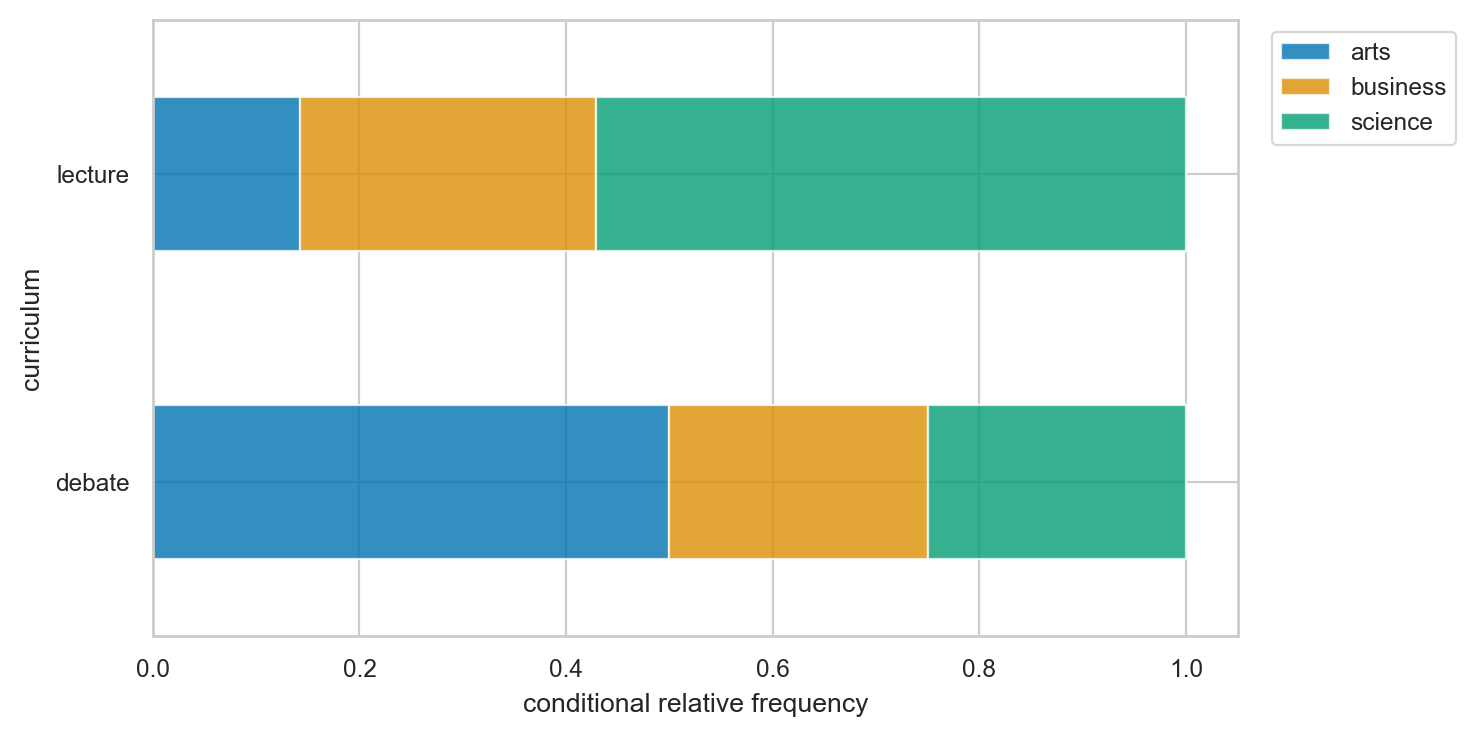

In [64]:
ct2 = pd.crosstab(
    index=students["curriculum"],
    columns=students["background"],
    normalize="index",
)
axct2 = ct2.plot(kind="barh", stacked=True, rot=0, alpha=0.8, )
plt.legend(loc = "upper left", bbox_to_anchor=(1.02,1))
plt.xlabel("conditional relative frequency")

## Explanations

### Kernel density plots

<Axes: xlabel='score', ylabel='Density'>

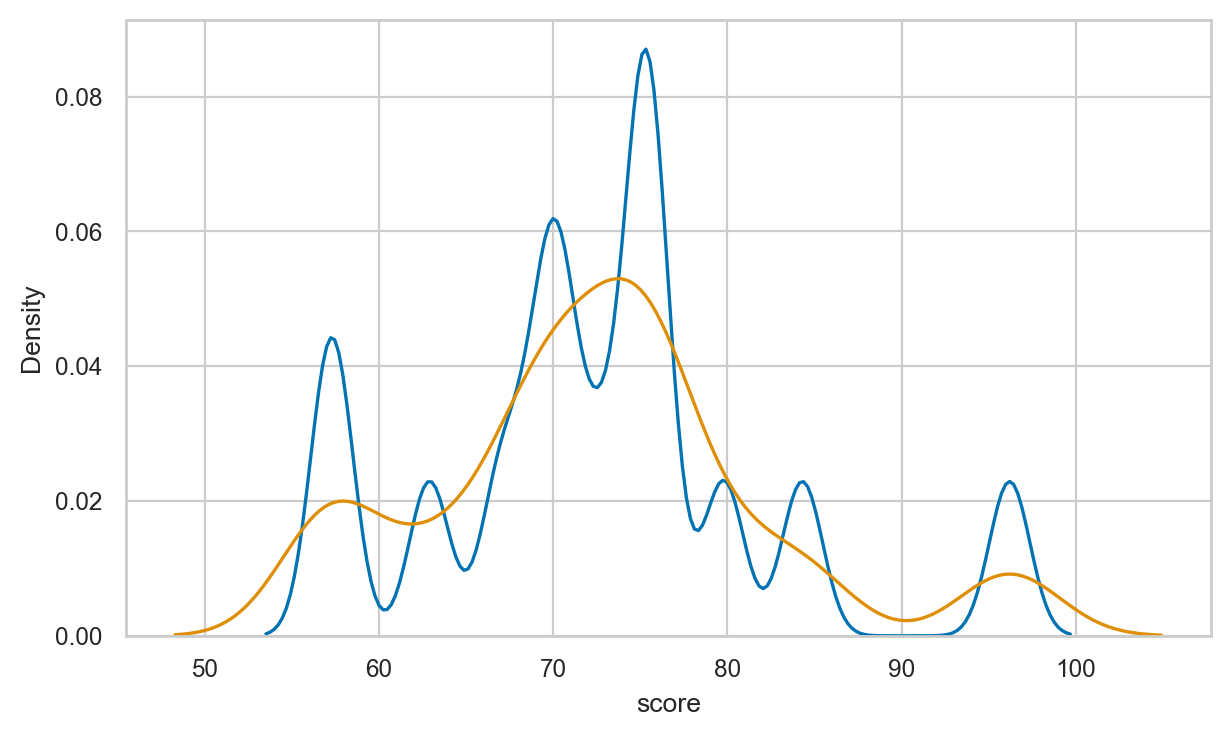

In [65]:
sns.kdeplot(data=students, x="score", bw_adjust=0.2)
sns.kdeplot(data=students, x="score", bw_adjust=0.5)

## Discussion

## Code implementations of `median` and `quantile` functions (bonus material)

### Linear interpolation for the median

When computing the median of a list of values,
it's not always possible to find a value from the list
that satisfies the definition "splits the list into equal parts."
For example, if the list has an even number of elements, then there is no single "middle" number.
The convention in this situation is to create a new number that consists of a 50-50 mix of
the two middle numbers, a process known as *linear interpolation*.

The code below shows the procedure for calculating the median:


In [66]:
def median(values):
    n = len(values)
    svalues = sorted(values)
    if n % 2 == 1:            # Case A: n is odd
        mid = n // 2
        return svalues[mid]
    else:                     # Case B: n is even
        j = n // 2
        return 0.5*svalues[j-1] + 0.5*svalues[j]


The logic in the above function splits into two cases, depending on $n$,
the length of the list of values. If $n$ is odd, we return the middle
value from the list of sorted values `svalues[mid]`. If $n$ is even, we
return a mixture of the two values straddling the midpoint.

It's not important that you understand the details of the above code
snippet, since Pandas will perform median calculations for you. I just
want you to be aware this interpolation is happening behind the scenes,
so you won't be surprised if the $\mathbf{Med}$ value you obtain is not one of
the observations in your dataset. For example, the median of a list of
integers is a decimal `median([1,2]) = 1.5`.


In [67]:
import numpy as np
assert median([1,300]) == np.median([1,300])

### Linear interpolation for quantiles

Linear interpolation is also used when computing quartiles, percentiles, and quantiles.
In this section, we'll explain the calculations and code for computing the $q$th quantile
for the dataset for anyone interested in learning the technical details.
Feel free to skip if you're not passionate about code.

Suppose we want to compute the $q$th quantile for a list of $n$ values
$\mathbf{x}=[x_0, x_1, x_2, \ldots, x_{n-1}]$.
We'll assume the values are already in sorted order.
The $q$th quantile corresponds to the position $p = q(n-1)$ within the list,
where $p$ is a decimal number between $0$ (index of the first element) and $n-1$ (index of the last element).
We can split the position into an integer part $i$ and a fractional part $g$,
where $i = \lfloor p \rfloor$ is the greatest
integer that's less than or equal to $p$,
and $g = p - \lfloor p \rfloor$ is what remains of $p$ once we remove the integer part.

The $q$th quantile lies somewhere between the values $x_i$ and $x_{i+1}$ in the list.
Specifically, the quantile computed by linear interpolation is a mixture
with proportion $g$ of $x_{i+1}$ and $(1-g)$ of $x_i$:

$$ \texttt{quantile}(\mathbf{x}, q) = (1-g) x_i + g x_{i+1}. $$

The code below shows the practical implementation of the math calculations described above.

In [68]:
def quantile(values, q):
    svalues = sorted(values)
    p = q * (len(values)-1)
    i = int(p)
    g = p - int(p)
    return (1-g)*svalues[i] + g*svalues[i+1]

The function we defined above is equivalent to the `np.quantile(q)` method
in Pandas and NumPy, which uses the linear interpolation by default.
Note however, there are other valid interpolation methods for computing
quantiles that may be used in other statistics software, so don't freak
out if you get different values when computing quantiles.

Everything we discussed about the quantile function also applies to
percentiles and quartiles. For example, the $k$^th^ quartile is given by
`quantile(q=k/4)`, and the $k$^th^ percentile is `quantile(q=k/100)`.

In [69]:
arr = [21, 22, 24, 24, 26, 97]
assert quantile(arr, 0.33) == np.quantile(arr, 0.33)
assert quantile(arr, 0.25) == np.quantile(arr, 0.25)
assert quantile(arr, 0.75) == np.quantile(arr, 0.75)


The function `quantile` we defined above:
- Equivalent to ``quantile(values, q, method="linear")`` in `numpy`.
- Equivalent to ``quantile(values, q, type=7)`` in R.